In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
import matplotlib.image as image
from IPython.display import HTML

import numpy as np

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

fox_image = image.imread('resources/fox-icon.jpg')
bun_image = image.imread('resources/bun-icon.jpg')
def animated_phaseplane(ts, xs, ys, fig, ax, stride=1):
    #stride = 1
    fox_image = image.imread('resources/fox-icon.jpg')
    bun_image = image.imread('resources/bun-icon.jpg')
    fox_width = .2
    fox_height = .2
    fox_pos = 0-fox_width, 0
    bun_width = .13
    bun_height = .2
    num_foxes = 20
    num_buns = 20
    
    # Plot Images #########################################
    bun_pos = fox_pos[0]+fox_width, fox_pos[1]-bun_height
    for i in range(num_foxes):
        ax.imshow(fox_image, aspect='auto', extent=(fox_pos[0], fox_pos[0]+fox_width, fox_pos[1]+fox_height*i, fox_pos[1]+fox_height*(i+1)), zorder=-1)
    for i in range(num_buns):
        ax.imshow(bun_image, aspect='auto', extent=(bun_pos[0]+bun_width*i, bun_pos[0]+bun_width*(i+1), bun_pos[1], bun_pos[1]+bun_height), zorder=-1)

    fox_patch = plt.Rectangle( (fox_pos[0], fox_pos[1]+fox_height*num_foxes),  fox_width, -fox_height*num_foxes + 1.5, facecolor='w', edgecolor='None', alpha=0.7)
    bun_patch = plt.Rectangle( (bun_pos[0]+bun_width*num_buns, bun_pos[1])  ,  -bun_width*num_buns + 1.5, bun_height*1.05, facecolor='w', edgecolor='None', alpha=0.7) 
                                 # the hieght of the rectangle is somehow not enough to cover th buns? -> bun_height*1.05

    margin = .1
    ax.set_xlim(fox_pos[0]-margin, 2+margin)
    ax.set_ylim(bun_pos[1]-margin, 2+margin)
    ########################################################

    line, = ax.plot(xs, ys, 'k-')
    point, = ax.plot(xs[0], ys[0], 'go')

    # Init only required for blitting to give a clean slate.

    point.set_data(xs[0], ys[0])
    ax.add_patch(fox_patch)
    ax.add_patch(bun_patch)
    def init():
        point.set_data(xs[0], ys[0])
        ax.add_patch(fox_patch)
        ax.add_patch(bun_patch)
        return point, 

    def animate(i):
        print('step %d/%d' % (i,len(ts)), end='\r')
        point.set_data(xs[i], ys[i])
        bun_patch.set_width(-bun_width*num_buns + xs[i])
        fox_patch.set_height(-fox_height*num_foxes + ys[i])
        return point, 

    anim = animation.FuncAnimation(fig, animate, np.arange(0,len(ts),stride), init_func=init,
                                  interval=1/24*1000, blit=True)

    # anim.save('negative-feedback_pulse.mp4', writer='imagemagick', fps=24)
    #plt.close()
    #HTML(anim.to_html5_video())
    return anim

def RK4_step(F, t, u, dt):
    k1 = F(t,u)
    k2 = F(t+dt/2, u + dt/2*k1)
    k3 = F(t+dt/2, u + dt/2*k2)
    k4 = F(t+dt, u + dt*k3)
    return u + dt/6*(k1+2*k2+2*k3+k4)

# Foxes and Rabbits

Before, you examined the differential equation for exponential population growth:
$$
\frac{dP}{dt} = rP
$$
in which we have one independent variable $t$ (time) and one dependent variable $P$ (population). Here we will look at our first *coupled system* of differential equations where we have multiple dependent variables. 

Suppose we wish to model the population of foxes (predators) and rabbits (prey) in some specified area. We expect both of these populations to change with time. We will denote the population of foxes as $F(t)$ since it changes with time, and similarly we will denote the population of rabbits as $R(t)$. The populations are *coupled* because foxes eat rabbits.

### Questions

Suppose the populations of foxes and rabbits are as depicted in the animation below. Try pausing the video and seeking to different times to answer the questions below.

**Q:** At time $t=0.5$ Are the populations of rabbits and foxes large or small? Are they increasing or decreasing. 

**Q:** At time $t=3.5$ Are the populations of rabbits and foxes large or small? Are they increasing or decreasing. 

**Q:** At time $t=6.0$ Are the populations of rabbits and foxes large or small? Are they increasing or decreasing. 

**Q:** How would you explain these observations?

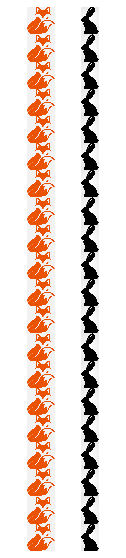

In [92]:
# generate_background image

# num_foxes = 20
# fox_height = 1
# fox_width = fox_height
# fox_pos = 0, 0

# bun_width = 1.3/2 * fox_width
# bun_height = fox_height
# num_buns = 20
# bun_pos = fox_pos[0]+ fox_width * 2, 0

# fig = plt.figure(figsize=(2, 10), frameon=False)

# for i in range(num_foxes):
#     plt.imshow(fox_image, aspect='auto', extent=(fox_pos[0], fox_pos[0]+fox_width, fox_pos[1]+fox_height*i, fox_pos[1]+fox_height*(i+1)), zorder=-1)
# for i in range(num_buns):
#     plt.imshow(bun_image, aspect='auto', extent=(bun_pos[0], bun_pos[0]+bun_width, bun_pos[1]+bun_height*i, bun_pos[1]+bun_height*(i+1)), zorder=-1)

# # plt.xlim(0, bun_pos[0] + bun_width)
# plt.axis('equal')
# plt.axis('off')

# # plt.savefig('resources/fox_rabbit_barchart.png', bbox_inches='tight')

# plt.show()

In [158]:
# parameters
# r = 2
# p = 0.05
# h = 0.1 * 0.2
# d = 0.05

r, p, h, d = 1, 1, 1, 1

#initial population
R0, F0 = 2, 2

# start and stop time
t0 = 0
t_final = 21

# don't modify below here ######################

def F(t, u):
    R, F = u
    return np.array([r*R - p*R*F, h*R*F - d*F])

Rs = [R0]
Fs = [F0]
ts = [t0]
Δt = 1e-2 # will change to fit start and stop times
steps = int(np.ceil((t_final - t0)/Δt))
Δt = (t_final - t0)/steps # adjust time step to fit exactly
for step in range(steps):
    R_new, F_new = RK4_step(F, ts[-1], np.array([Rs[-1], Fs[-1]]), Δt)
    Rs.append(R_new)
    Fs.append(F_new)
    ts.append(ts[-1] + Δt)

# plt.plot(ts, Rs)
# plt.plot(ts, Fs)

# print(min(Rs + Fs))
    
# Animate
stride = 5

fig, ax = plt.subplots(1, figsize=(5,10))

window_height = max(Rs + Fs) * 1.1

img_width, img_height = window_height/5, window_height

halfway = img_width/2

img = image.imread('resources/fox_rabbit_barchart.png')
ax.imshow(img, aspect='auto', extent=(0, img_width, 0, img_height), zorder=-1)

fox_patch = plt.Rectangle( (0, window_height),  halfway, -(window_height-F0), facecolor='w', edgecolor='None', alpha=0.7)
bun_patch = plt.Rectangle( (halfway, window_height),  2*halfway, -(window_height-F0), facecolor='w', edgecolor='None', alpha=0.7)

margin = .1

ax.add_patch(fox_patch)
ax.add_patch(bun_patch)

time_text = ax.text(.5, .05, '$t=0$')

# ax.set_xticks([])

ax.set_ylim(0, window_height)
ax.axis('equal')
ax.axis('off')

def init():
    ax.add_patch(fox_patch)
    ax.add_patch(bun_patch)
    return fox_patch, 

def animate(i):
    #print('step %d/%d' % (i,len(ts)), end='\r')
    bun_patch.set_height(-window_height + Rs[i])
    fox_patch.set_height(-window_height + Fs[i])
    time_text.set_text('$t=%.2f$' % (i * Δt))
    return fox_patch, 

anim = animation.FuncAnimation(fig, animate, np.arange(0,len(ts),stride), init_func=init,
                              interval=1/24*1000, blit=True)

# anim.save('negative-feedback_pulse.mp4', writer='imagemagick', fps=24)
plt.close()
HTML(anim.to_html5_video())
# print('') # clear loading text

We will use a system of differential equations to describe how the populations evolve over time. Before doing so, let us make some observations and assumptions
- The more rabbits there are, the more babies they have.
    - <font color="blue">Assume that the population of rabbits grows at a rate proportional to the population of rabbits.</font> (just like exponential growth)
- <font color="green">Foxes eat rabbits. </font>
    - If there are many rabbits and many foxes, the population of rabbits will decline quickly.
    - If there are many foxes and few rabbits, some rabbits will be hunted, but they will be harder to find.
    - If there are few foxes and many rabbits, rabbits will be easy to find, but there will not be many foxes hunting.
- Assume that the population of foxes is limited by the food supply. This is different than the exponential model for population.
    - <font color="magenta">The population of foxes will grow proportional to the rate they hunt rabbits.</font>
    - <font color="red">Foxes eventually die.</font> The more foxes there are the more will die each unit of time.

Each of the color-coded statements above will give us a piece of our model. They each modify either $\frac{dR}{dt}$ or $\frac{dF}{dt}$ by some proportion of another variable. We will need positive constants representing the rates for each: $\color{blue}{r}, \color{green}{p}, \color{magenta}{h}$, and $\color{red}{d}$.
- $\color{blue}{r}$ is the population growth <font color="blue">r</font>ate of rabbits. That is that $R$ will **increase** at a rate $\color{blue}{rR}$ just as in the exponential growth model before.
- $\color{red}{d}$ is the <font color="red">d</font>eath rate. So $F$ will **decrease** at a rate of $\color{red}{dF}$.

The next two constants *couple* the two populations and describe how they interact. It these cases, it is common to use a **mixing** term such as $R\cdot F$. This value nicely captures dynamics of the "<font color="green">Foxes eat rabbits</font>" rule. We then make the rules:
- $\color{green}{p}$ is the <font color="green">p</font>redation rate. So $R$ will **decrease** at a rate $\color{green}{pRF}$.
- $\color{magenta}{h}$ is the <font color="magenta">h</font>unting-birth rate. So $F$ will **increase** at a rate of $\color{magenta}{hRF}$.

Putting these together we arrive at the [Lotka-Volterra Model](http://www.scholarpedia.org/article/Predator-prey_model#Lotka-Volterra_Model):
$$
\begin{align*}
\frac{dR}{dt} &= \color{blue}{rR} - \color{green}{pRF} \\
\frac{dF}{dt} &= \color{magenta}{hRF} - \color{red}{dF}
\end{align*}
$$

To analyze this model, it will be convenient to factor the expressions as follows:
$$
\begin{align*}
\frac{dR}{dt} &= p\left(\frac{r}{p} - F\right) \cdot R \\
\frac{dF}{dt} &= h\left(R - \frac{h}{d}\right) \cdot F
\end{align*}
$$
To see why this is helpful, let us try to answer the question: when will the population of rabbits be increasing/decreasing? The population will be increasing when  $\frac{dR}{dt} > 0$. Since $p, R > 0$ this can only happen when $\frac{r}{p} - F > 0$. Thus, the population of rabbits will be decreasing when $F < \frac{r}{p}$. Similarly, the population of rabbits will be decreasing when $F < \frac{r}{p}$.

### Questions

**Q:** When will the population of foxes be increasing/decreasing?

**Q:** When will the populations be stable? (i.e. $\frac{dR}{dt} = 0$ and $\frac{dF}{dt} = 0$)

When looking at multiple dependent variables, it can be helpful to plot pairs of them together on the same graph. Below we see the population of rabbits is the horizontal axis (usually we think of this as the $x$-axis, but now we will think of it as the $R$-axis) and the population of foxes is on the vertical axis (usually the $y$-axis, but here it is the $F$-axis). We see the <font color="green">green</font> point $(R,F)$ represents both populations at any given time. Over time it traces a curve through the $R$-$F$ plane. This type of plot is called a **phase plane**.

In [167]:
# parameters
# r = 2
# p = 0.05
# h = 0.1 * 0.2
# d = 0.05

r, p, h, d = [.5]*4

#initial population
R0, F0 = 2, 1

# start and stop time
t0 = 0
t_final = 21

# don't modify below here ######################

def F(t, u):
    R, F = u
    return np.array([r*R - p*R*F, h*R*F - d*F])

Rs = [R0]
Fs = [F0]
ts = [t0]
Δt = 1e-2 # will change to fit start and stop times
steps = int(np.ceil((t_final - t0)/Δt))
Δt = (t_final - t0)/steps # adjust time step to fit exactly
for step in range(steps):
    R_new, F_new = RK4_step(F, ts[-1], np.array([Rs[-1], Fs[-1]]), Δt)
    Rs.append(R_new)
    Fs.append(F_new)
    ts.append(ts[-1] + Δt)
    
fig, ax = plt.subplots(1, figsize=(10,10))
stride = 10
anim = animated_phaseplane(ts, Rs, Fs, fig, ax, stride=stride)
plt.close()
HTML(anim.to_html5_video())

### Questions

**Q:** The green dot (the population vector) is not moving at a constant speed? When is it slow, and when is it fast. Can you explain this using our system of equations?

**Q:** Will the populations of rabbits or foxes ever go extinct?

# Old stuff - Ignore

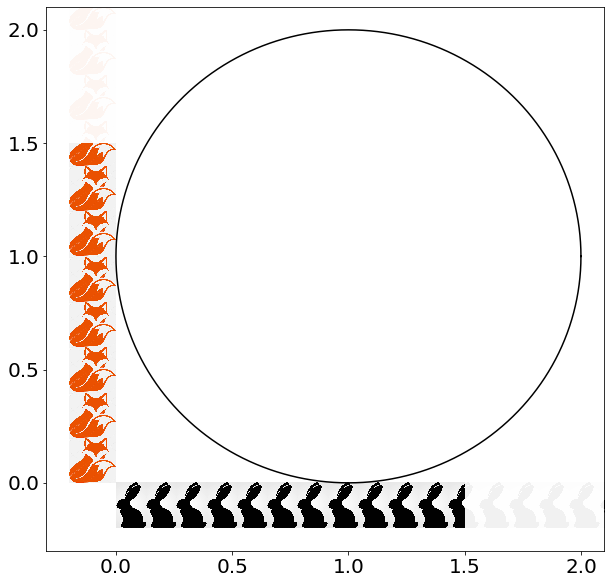

In [7]:
fox_image = image.imread('resources/fox-icon.jpg')
bun_image = image.imread('resources/bun-icon.jpg')
fox_width = .2
fox_height = .2
fox_pos = 0-fox_width, 0
bun_width = .13
bun_height = .2
num_foxes = 20
num_buns = 20

fig, ax = plt.subplots(1, figsize=(10,10))
ts = np.linspace(0, 2*np.pi, 201)
ax.plot(np.cos(ts)+1, np.sin(ts)+1, 'k-')

bun_pos = fox_pos[0]+fox_width, fox_pos[1]-bun_height
for i in range(num_foxes):
    ax.imshow(fox_image, aspect='auto', extent=(fox_pos[0], fox_pos[0]+fox_width, fox_pos[1]+fox_height*i, fox_pos[1]+fox_height*(i+1)), zorder=-1)
for i in range(num_buns):
    ax.imshow(bun_image, aspect='auto', extent=(bun_pos[0]+bun_width*i, bun_pos[0]+bun_width*(i+1), bun_pos[1], bun_pos[1]+bun_height), zorder=-1)
    
fox_patch = Rectangle( (fox_pos[0], fox_pos[1]+fox_height*num_foxes),  fox_width, -fox_height*num_foxes + 1.5)
bun_patch = Rectangle( (bun_pos[0]+bun_width*num_buns, bun_pos[1])  ,  -bun_width*num_buns + 1.5, bun_height*1.05) 
                         # the hieght of the rectangle is somehow not enough to cover th buns? -> bun_height*1.05

my_patches = PatchCollection([fox_patch, bun_patch], facecolor='w', edgecolor='None', alpha=0.95)
ax.add_collection(my_patches)

margin = .1
ax.set_xlim(fox_pos[0]-margin, 2+margin)
ax.set_ylim(bun_pos[1]-margin, 2+margin)
plt.show()

In [19]:
ts = np.linspace(0, 2*np.pi, 201)
xs = np.cos(2*ts)+1
ys = np.sin(4*ts)+1
fig, ax = plt.subplots(1, figsize=(10,10))

anim = animated_phaseplane(ts, xs, ys, fig, ax)

plt.close()
HTML(anim.to_html5_video())

In [17]:
ts = np.linspace(0, 2*np.pi, 201)
xs = np.cos(2*ts)+1
ys = np.sin(4*ts)+1

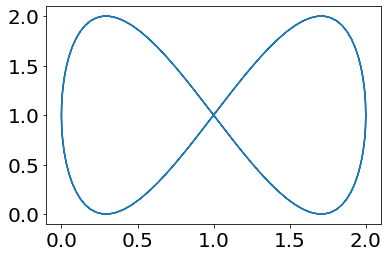

In [18]:
plt.plot(xs, ys)